In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

from collections import Counter
from itertools import combinations 
from sklearn.cluster import MeanShift
from sklearn.preprocessing import scale

In [45]:
df1           = pd.read_pickle("./ds1_trans.pkl")
df2           = pd.read_pickle("./ds2_trans.pkl")
df1_churn     = pd.read_pickle("./df1_churn.pkl")
df2_churn     = pd.read_pickle("./df2_churn.pkl")
df1_not_churn = pd.read_pickle("./df1_not_churn.pkl")
df2_not_churn = pd.read_pickle("./df2_not_churn.pkl")

df1           = df1.drop('churn', axis=1)
df2           = df2.drop('Churn', axis=1)
df1_churn     = df1_churn.drop('churn', axis=1)
df2_churn     = df2_churn.drop('Churn', axis=1)
df1_not_churn = df1_not_churn.drop('churn', axis=1)
df2_not_churn = df2_not_churn.drop('Churn', axis=1)

**Steps**
* Each clustering to be done with and without scalling so as to determine which gives better result
* Clustering whole datasets
* Clustering the churn and non-churn datasets

In [62]:
d = {}
for i in range(1,11):
    clustering = MeanShift(bandwidth=10*i)
    clustering.fit(df1)
    count_labels = Counter(list(clustering.labels_))
    x = len(count_labels.keys())
    count_labels = sorted(count_labels.items(), key=operator.itemgetter(1), reverse=True)
    d['BW='+str(10*i)+" no="+str(x)] = count_labels

l = pd.DataFrame.from_dict(d, orient='index')
l = l.transpose()
l

BW=10 no=3333 BW=20 no=3329 BW=30 no=3236 BW=40 no=2520 BW=50 no=1299  \
0           (0, 1)        (0, 2)        (0, 4)       (2, 15)       (0, 63)   
1           (1, 1)        (1, 2)        (1, 4)       (7, 11)       (3, 34)   
2           (2, 1)        (2, 2)        (4, 3)       (1, 11)       (1, 33)   
3           (3, 1)        (3, 2)        (2, 3)       (3, 10)       (2, 32)   
4           (4, 1)        (4, 1)        (3, 3)      (15, 10)       (4, 30)   
5           (5, 1)        (5, 1)        (5, 3)       (5, 10)      (10, 30)   
6           (6, 1)        (6, 1)        (6, 3)        (8, 9)      (19, 28)   
7           (7, 1)        (7, 1)        (7, 2)        (0, 9)       (7, 27)   
8           (8, 1)        (8, 1)        (8, 2)        (6, 9)       (5, 27)   
9           (9, 1)        (9, 1)        (9, 2)        (4, 9)      (18, 26)   
10         (10, 1)       (10, 1)       (10, 2)       (28, 8)       (6, 26)   
11         (11, 1)       (11, 1)       (11, 2)       (13, 8)       (9, 25)   
12         (12, 1)       (12, 1)       (12, 2)       (26, 8)      (16, 25)   
13         (13, 1)       (13, 1)       (13, 2)       (36, 7)       (8, 25)   
14         (14, 1)       (14, 1)       (14, 2)        (9, 7)      (26, 21)   
15         (15, 1)       (15, 1)       (15, 2)       (21, 7)      (11, 21)   
16         (16, 1)       (16, 1)       (16, 2)       (12, 7)      (33, 21)   
17         (17, 1)       (17, 1)       (17, 2)       (10, 7)      (15, 20)   
18         (18, 1)       (18, 1)       (18, 2)       (14, 7)      (20, 20)   
19         (19, 1)       (19, 1)       (19, 2)       (20, 7)      (28, 19)   
20         (20, 1)       (20, 1)       (20, 2)       (19, 7)      (12, 19)   
21         (21, 1)       (21, 1)       (21, 2)       (11, 7)      (14, 18)   
22         (22, 1)       (22, 1)       (22, 2)       (30, 7)      (24, 18)   
23         (23, 1)       (23, 1)       (23, 2)       (27, 7)      (17, 17)   
24         (24, 1)       (24, 1)       (24, 2)       (57, 6)      (27, 17)   
25         (25, 1)       (25, 1)       (25, 2)       (40, 6)      (13, 16)   
26         (26, 1)       (26, 1)       (26, 2)       (85, 6)      (31, 15)   
27         (27, 1)       (27, 1)       (27, 2)       (38, 6)      (25, 15)   
28         (28, 1)       (28, 1)       (28, 2)       (49, 6)      (35, 15)   
29         (29, 1)       (29, 1)       (29, 2)       (55, 6)      (21, 14)   
...            ...           ...           ...           ...           ...   
3303     (3303, 1)     (3303, 1)          None          None          None   
3304     (3304, 1)     (3304, 1)          None          None          None   
3305     (3305, 1)     (3305, 1)          None          None          None   
3306     (3306, 1)     (3306, 1)          None          None          None   
3307     (3307, 1)     (3307, 1)          None          None          None   
3308     (3308, 1)     (3308, 1)          None          None          None   
3309     (3309, 1)     (3309, 1)          None          None          None   
3310     (3310, 1)     (3310, 1)          None          None          None   
3311     (3311, 1)     (3311, 1)          None          None          None   
3312     (3312, 1)     (3312, 1)          None          None          None   
3313     (3313, 1)     (3313, 1)          None          None          None   
3314     (3314, 1)     (3314, 1)          None          None          None   
3315     (3315, 1)     (3315, 1)          None          None          None   
3316     (3316, 1)     (3316, 1)          None          None          None   
3317     (3317, 1)     (3317, 1)          None          None          None   
3318     (3318, 1)     (3318, 1)          None          None          None   
3319     (3319, 1)     (3319, 1)          None          None          None   
3320     (3320, 1)     (3320, 1)          None          None          None   
3321     (3321, 1)     (3321, 1)          None          None          None   
3322     (3322, 1)     (332

### For entire Dataset 1
* bw = 150 ; c = 1


dict_keys([0])
dict_values([3333])


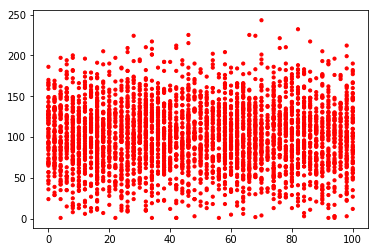

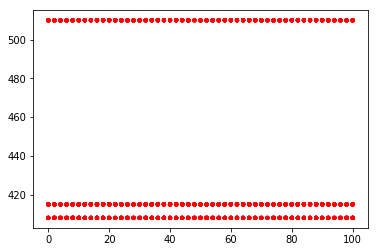

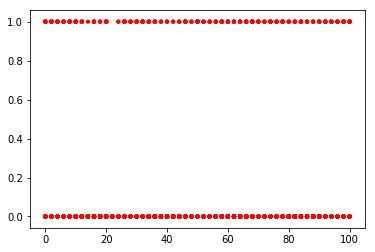

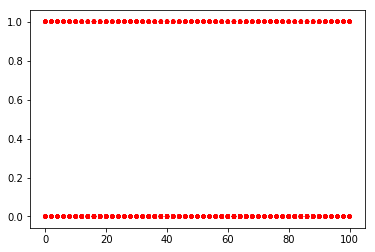

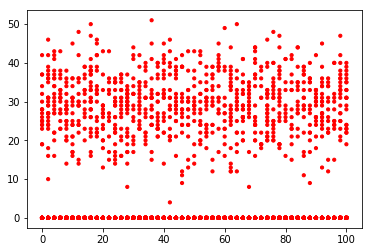

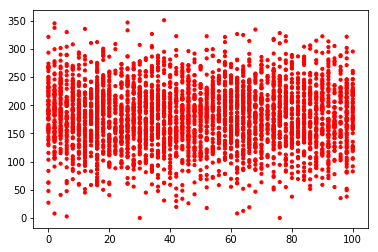

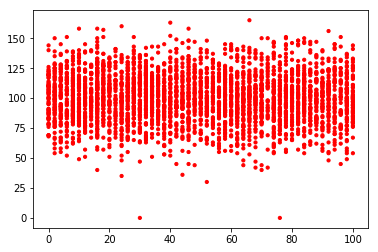

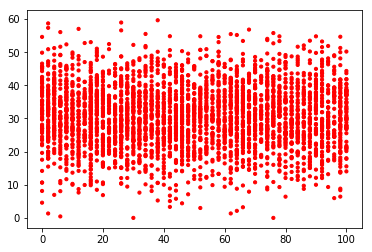

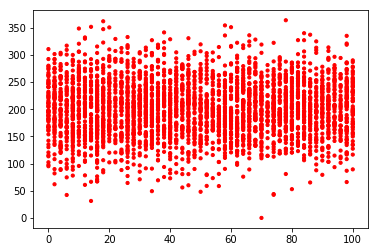

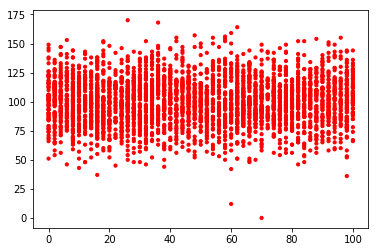

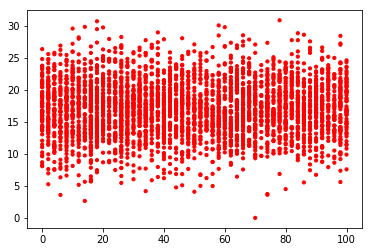

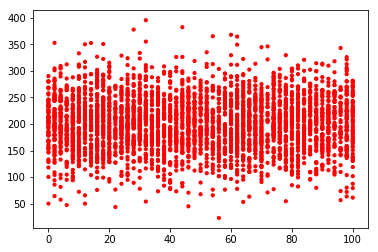

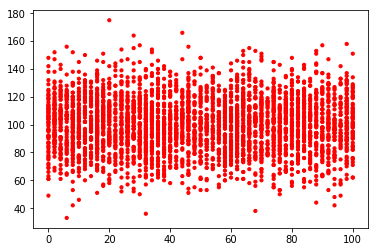

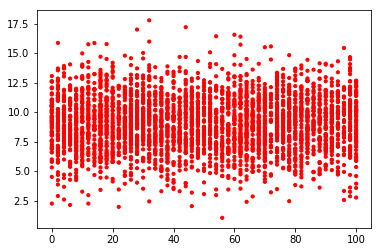

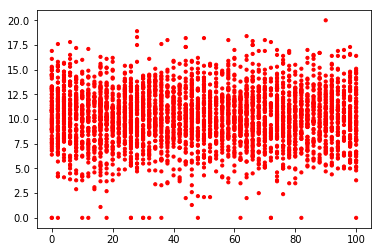

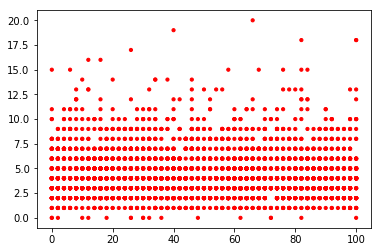

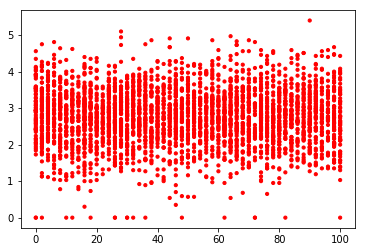

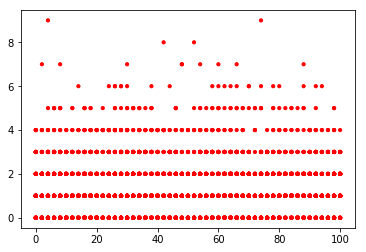

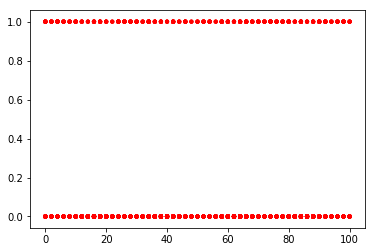

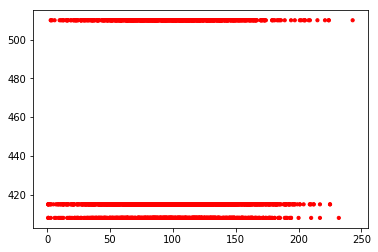

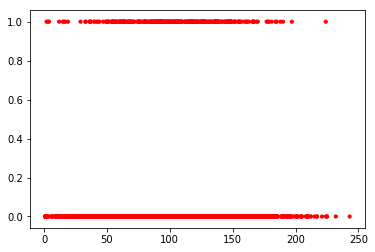

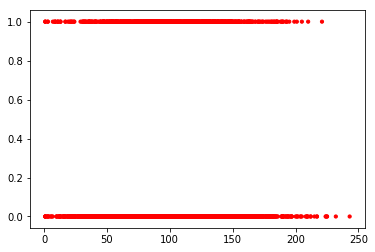

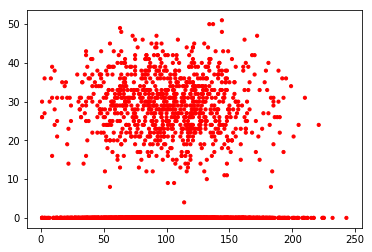

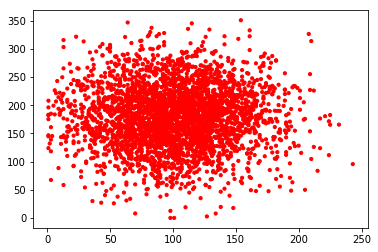

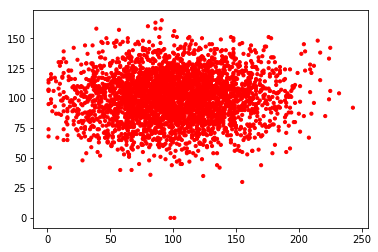

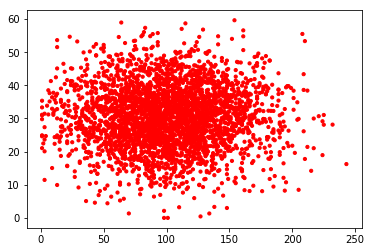

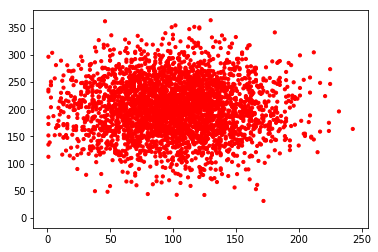

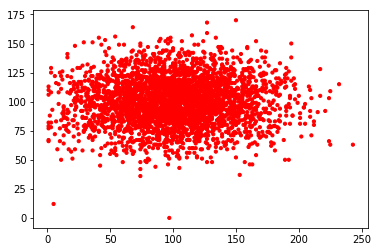

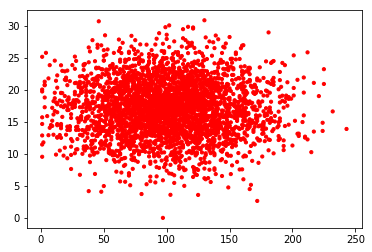

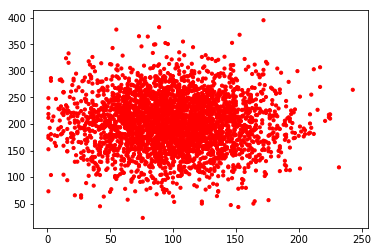

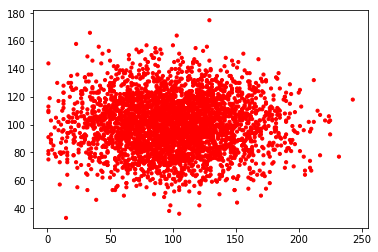

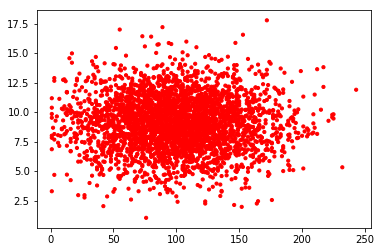

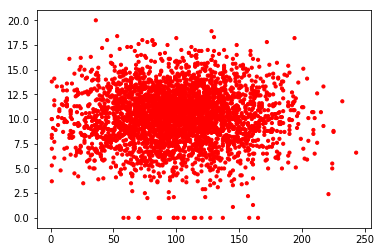

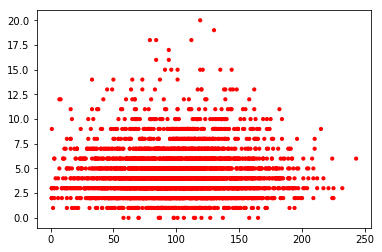

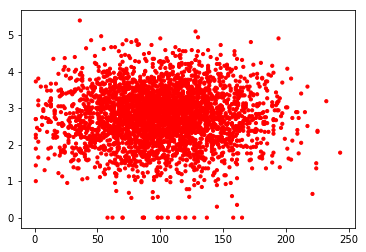

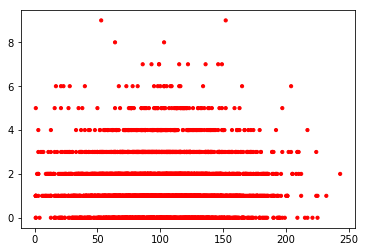

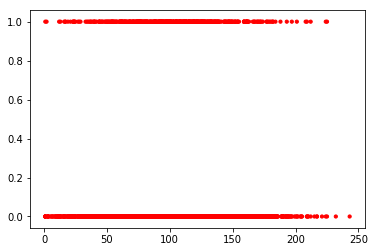

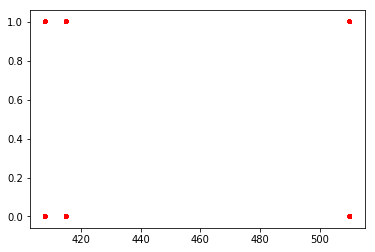

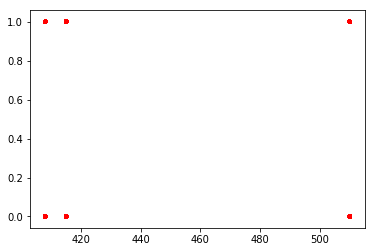

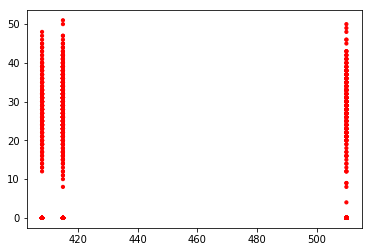

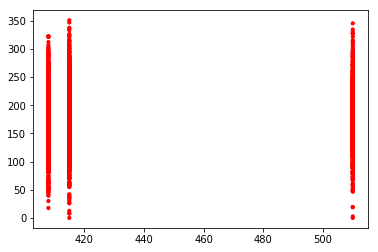

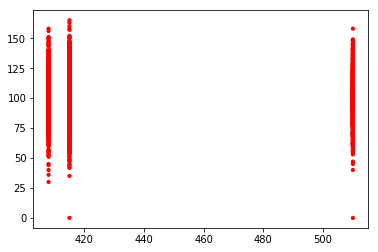

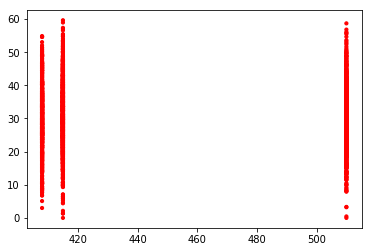

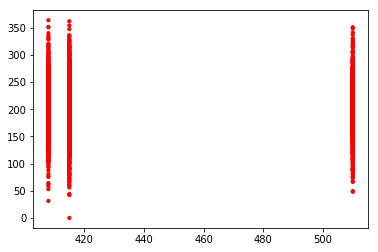

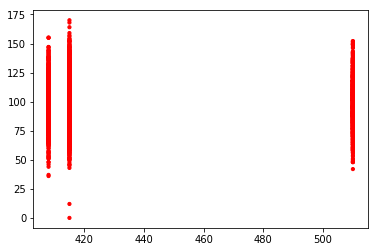

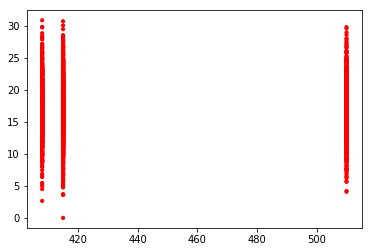

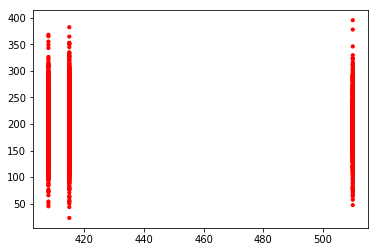

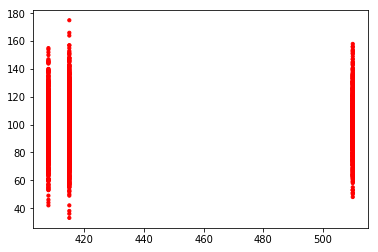

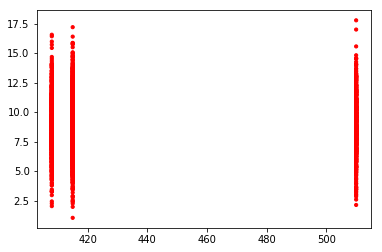

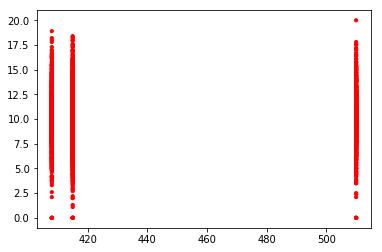

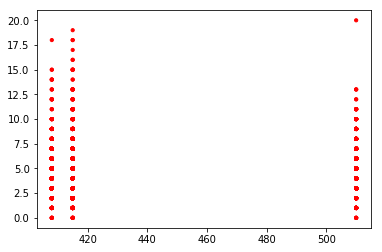

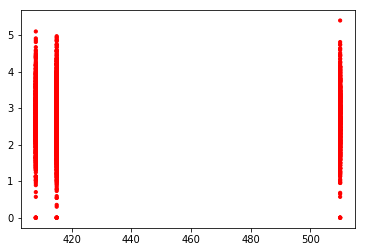

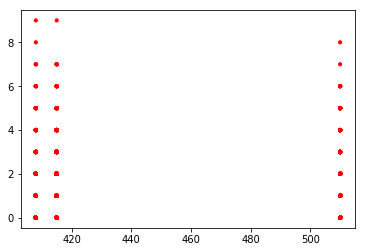

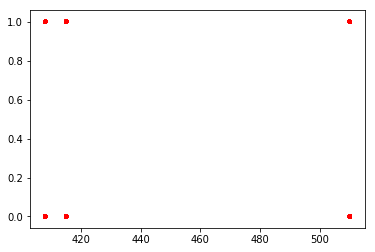

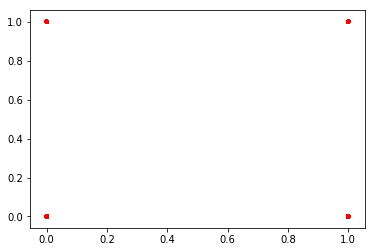

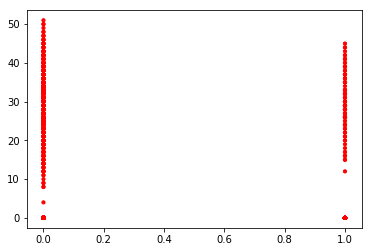

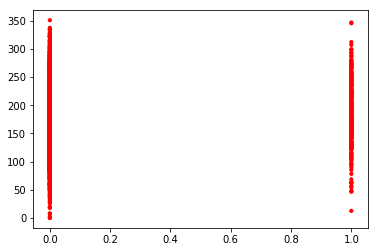

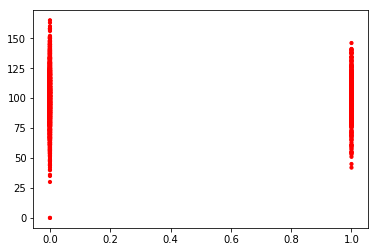

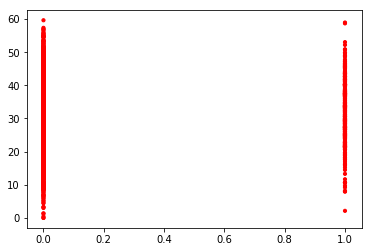

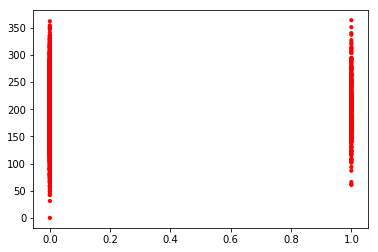

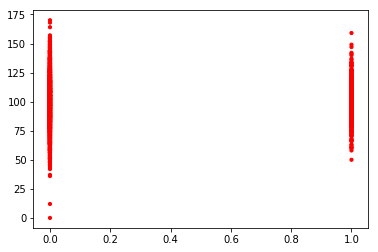

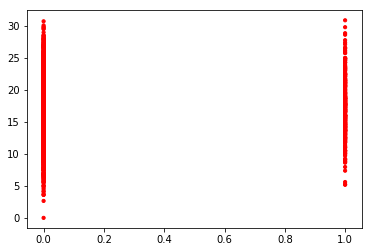

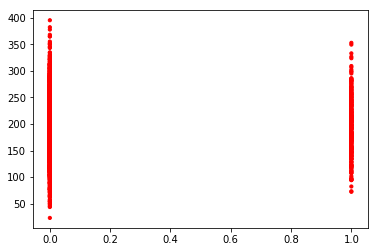

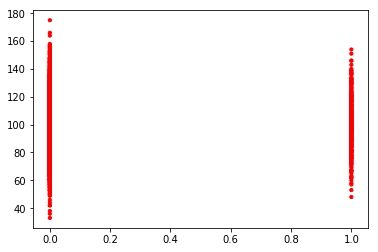

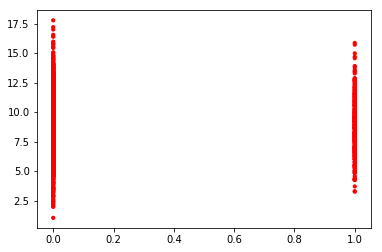

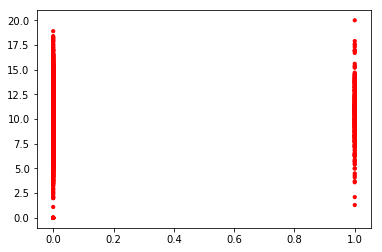

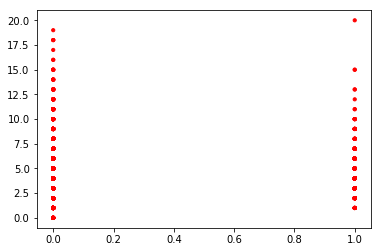

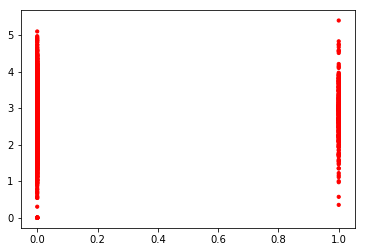

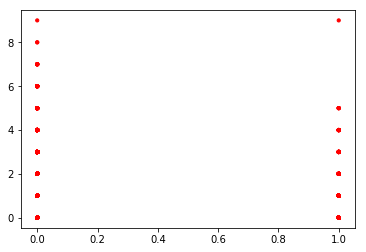

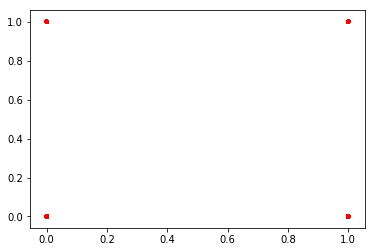

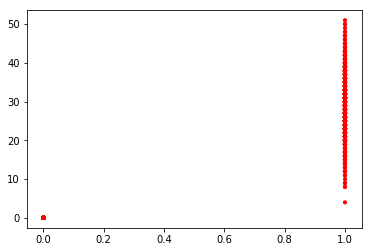

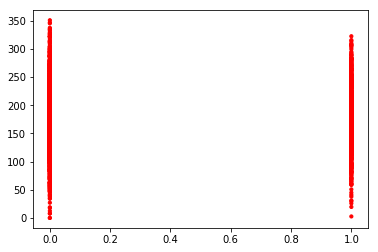

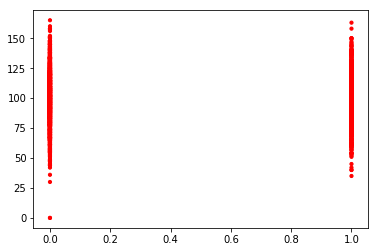

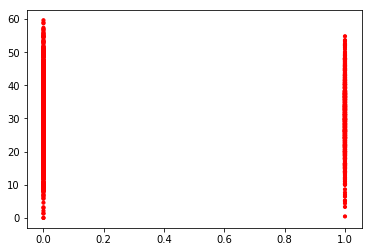

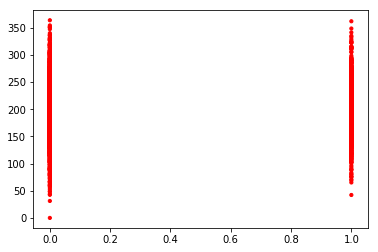

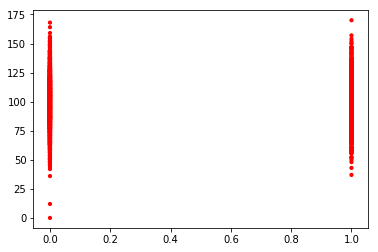

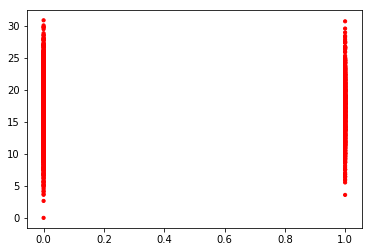

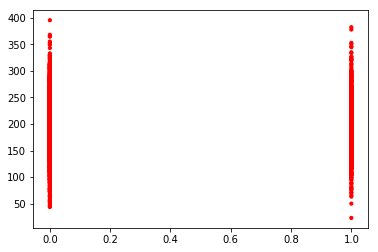

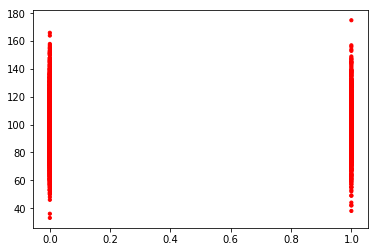

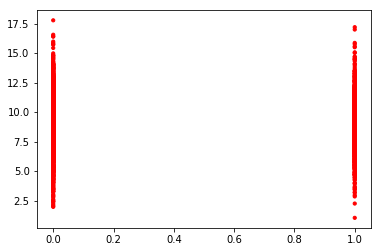

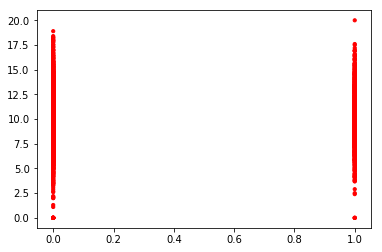

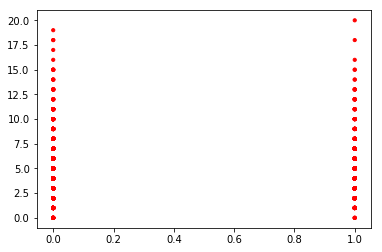

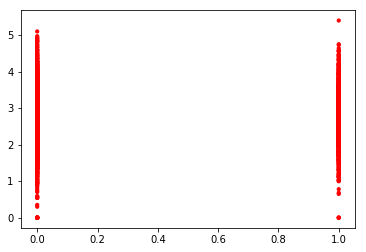

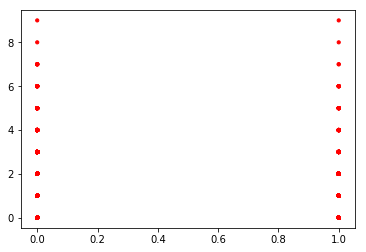

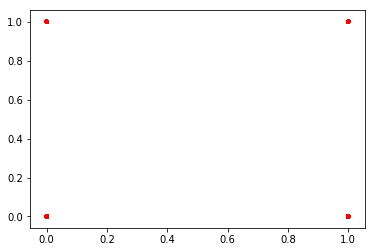

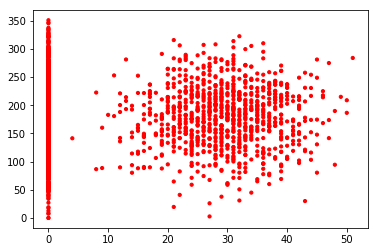

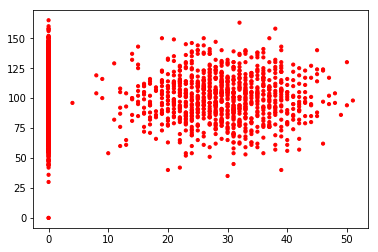

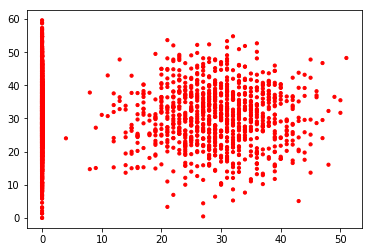

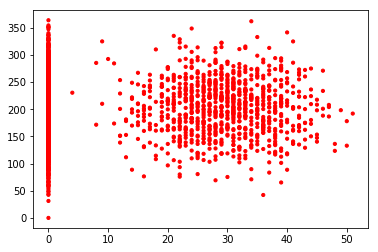

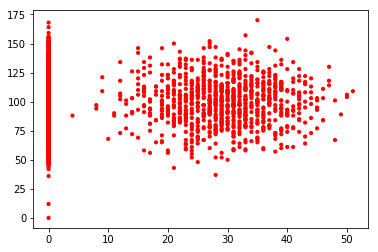

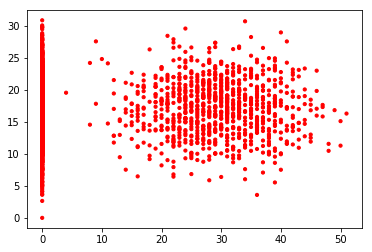

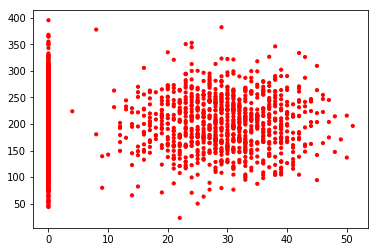

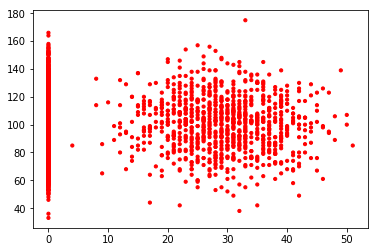

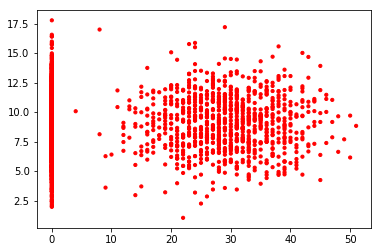

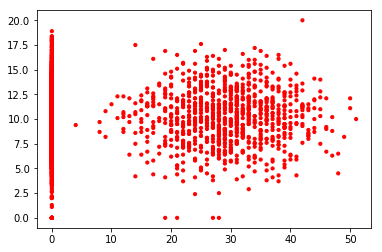

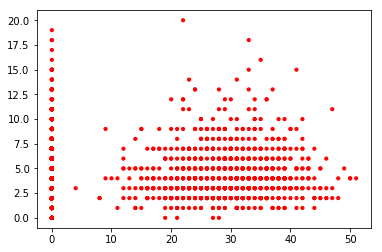

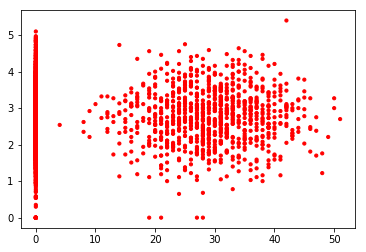

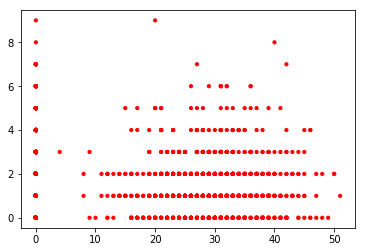

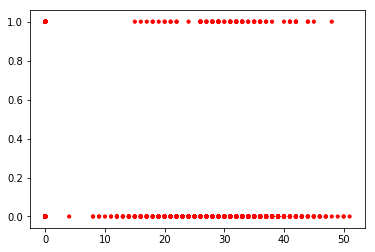

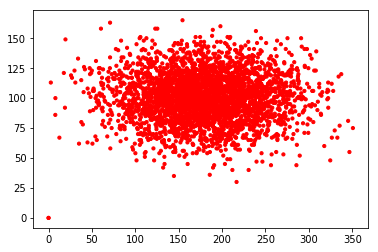

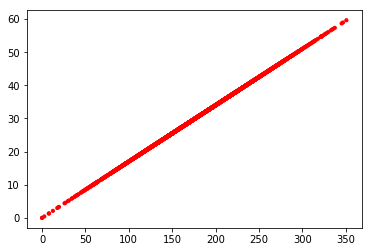

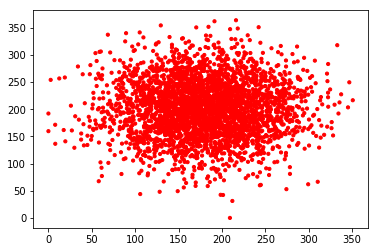

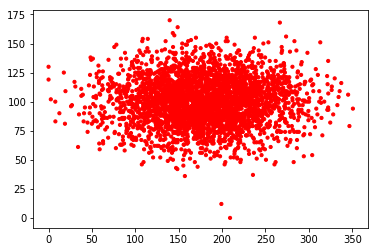

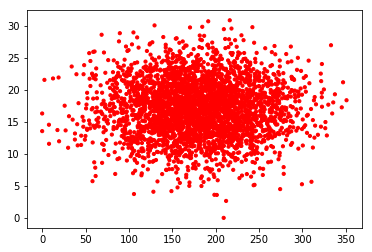

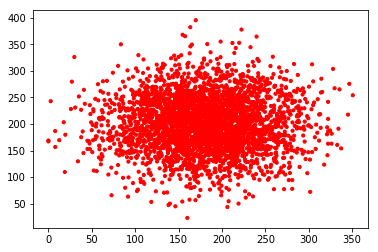

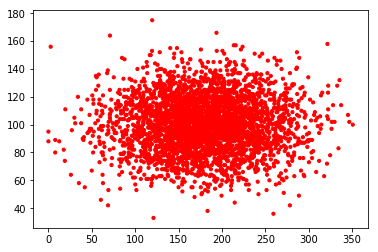

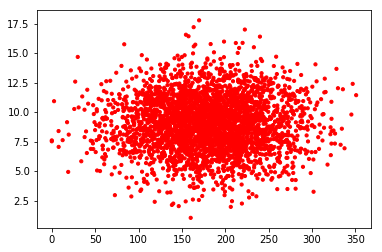

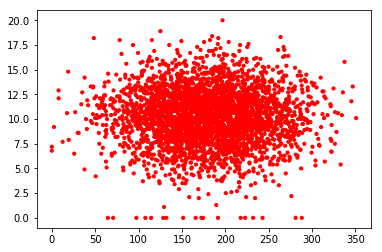

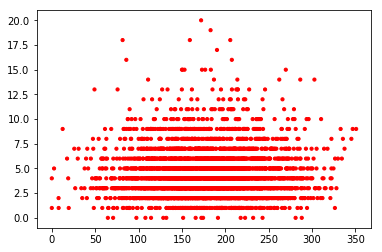

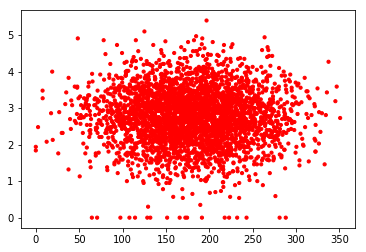

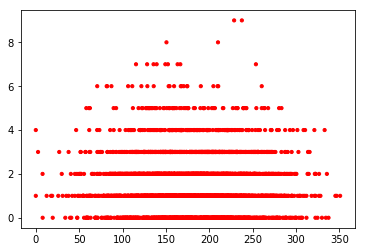

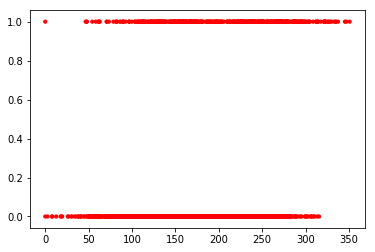

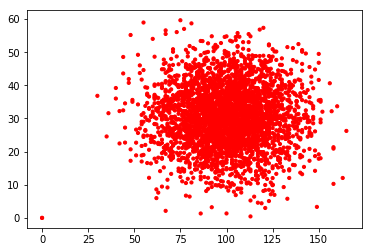

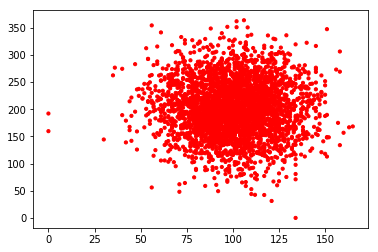

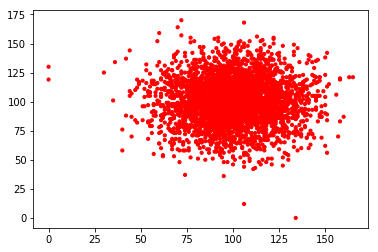

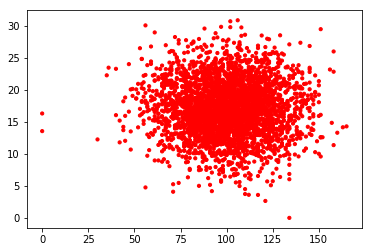

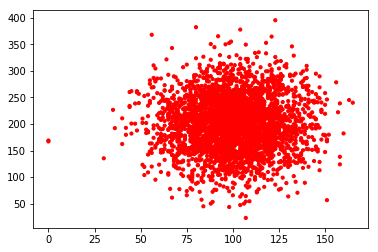

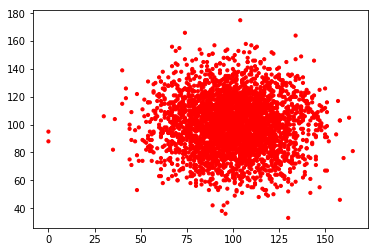

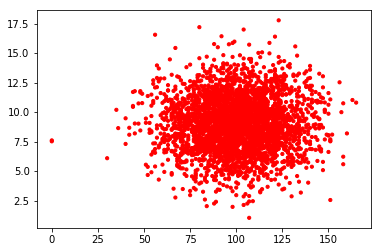

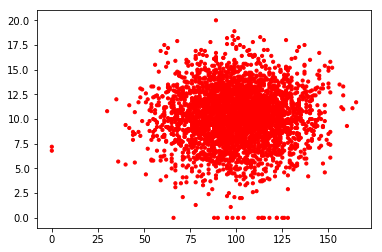

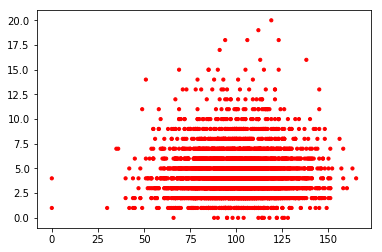

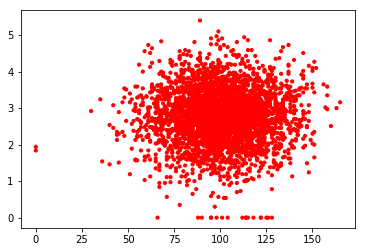

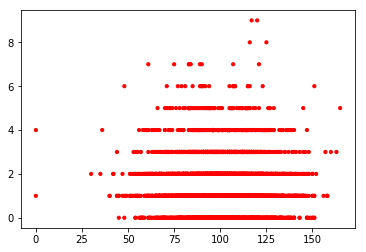

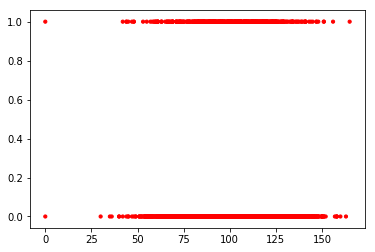

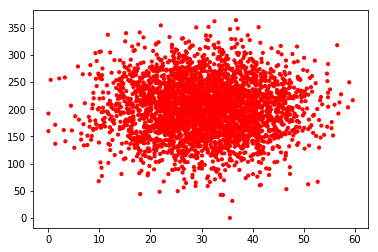

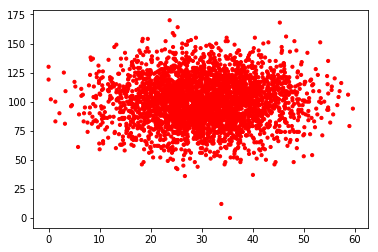

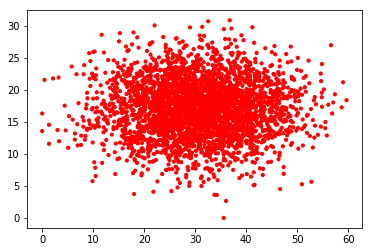

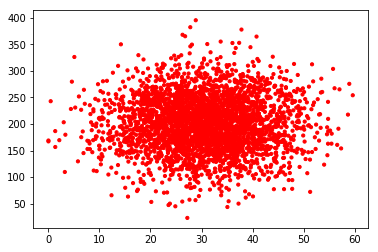

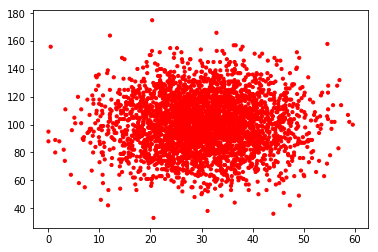

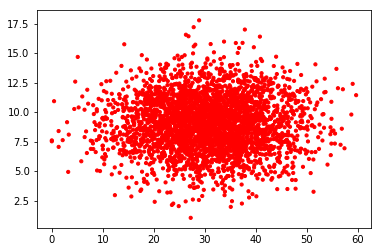

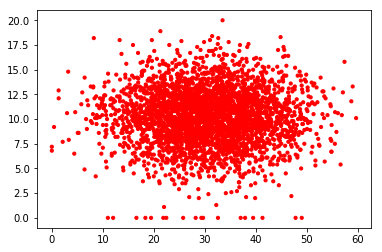

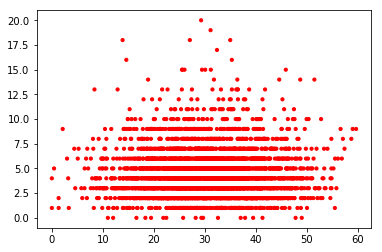

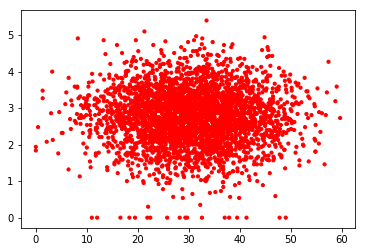

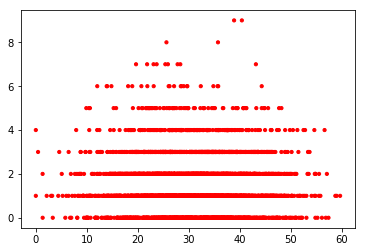

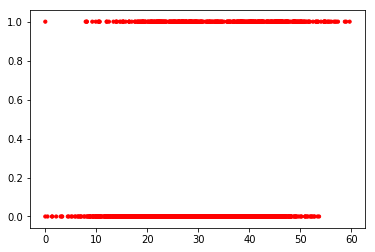

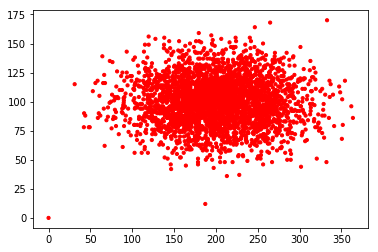

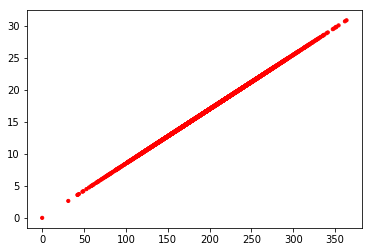

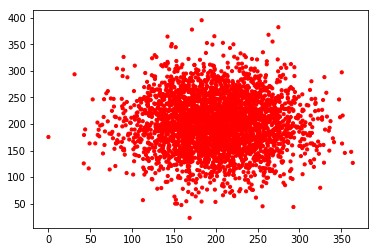

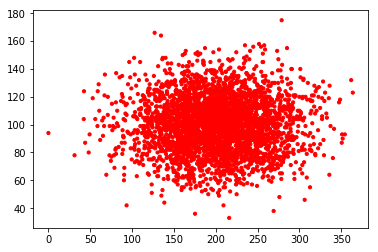

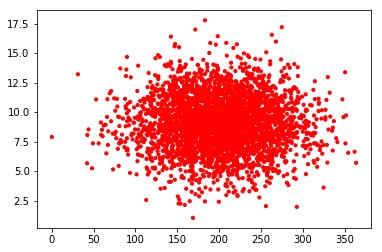

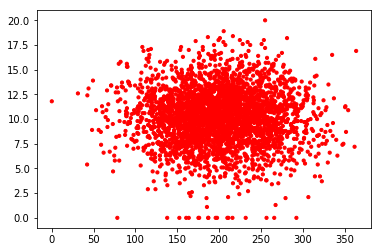

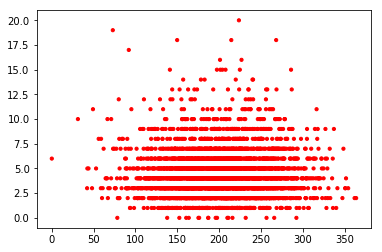

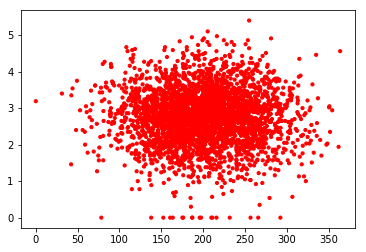

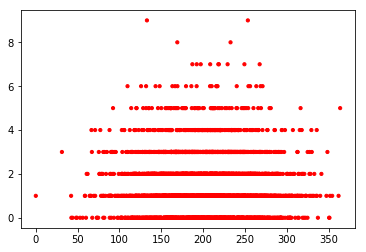

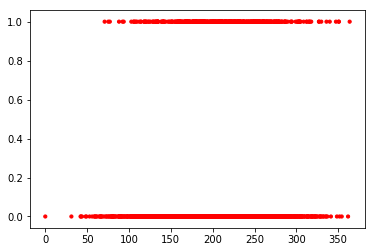

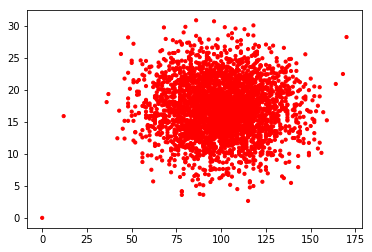

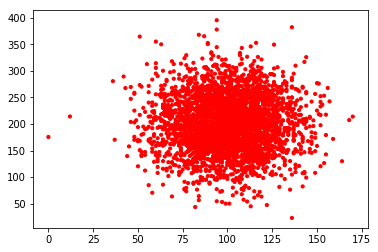

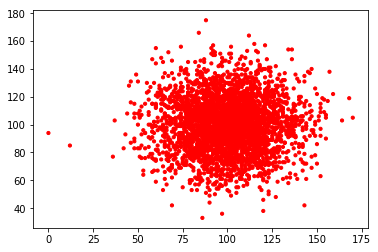

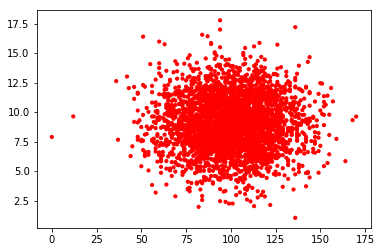

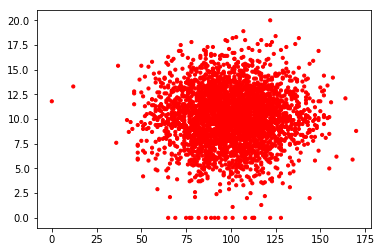

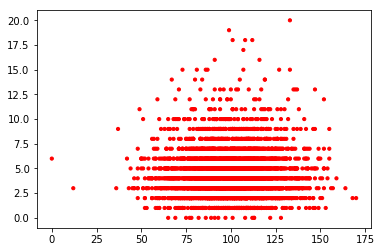

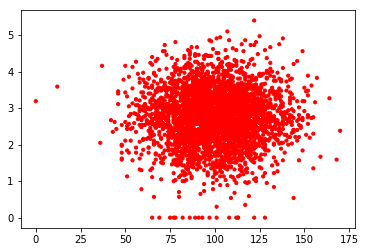

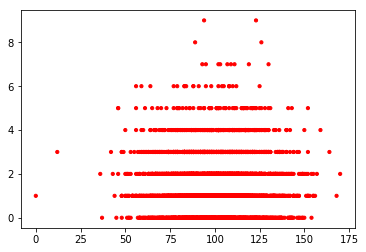

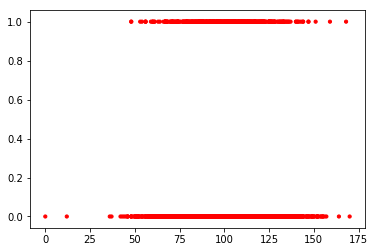

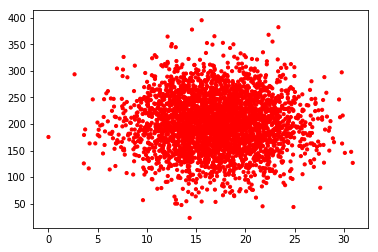

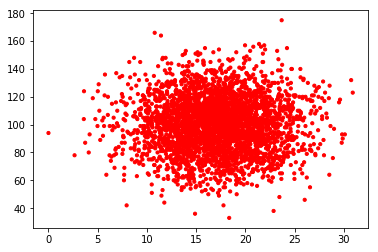

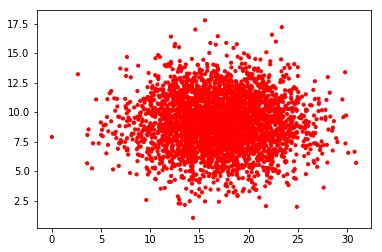

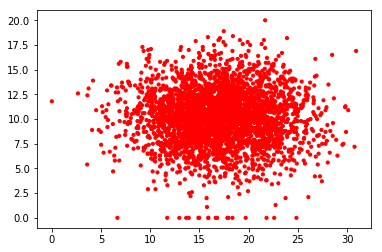

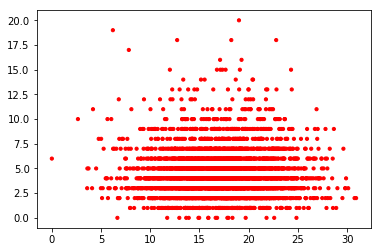

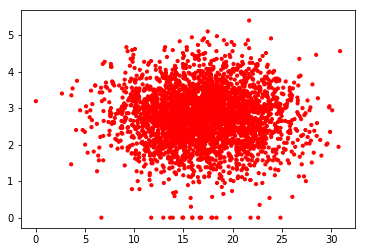

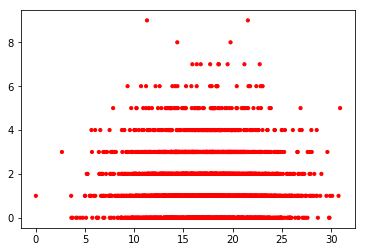

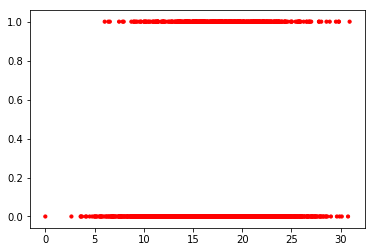

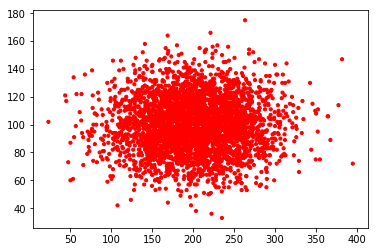

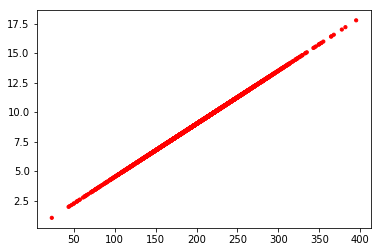

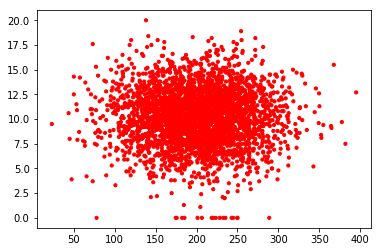

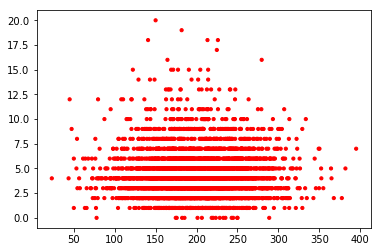

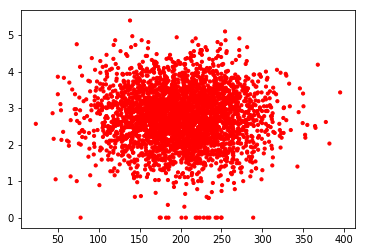

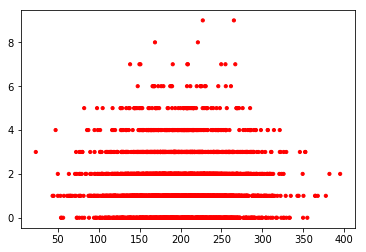

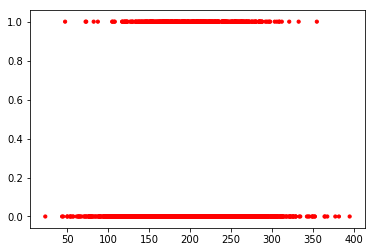

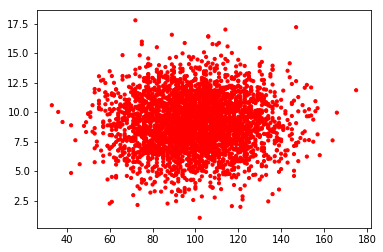

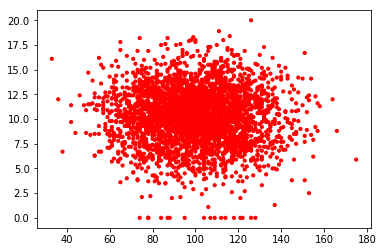

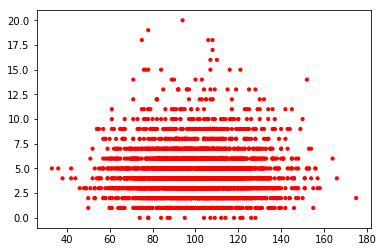

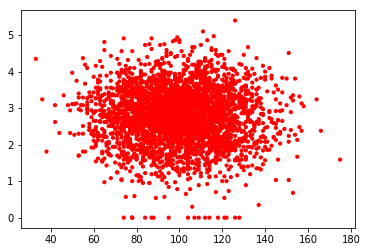

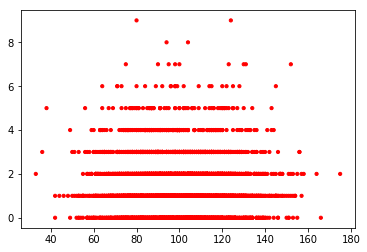

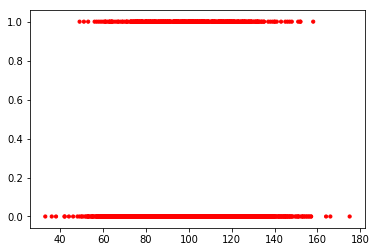

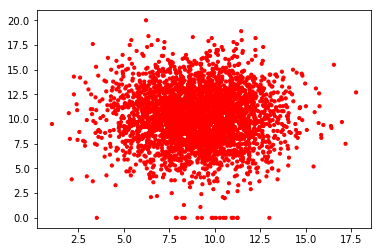

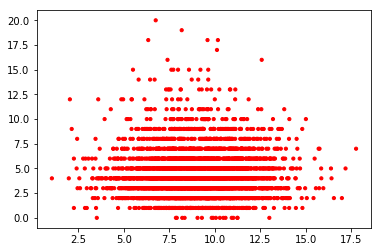

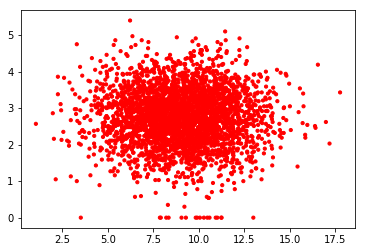

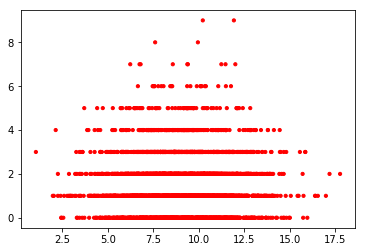

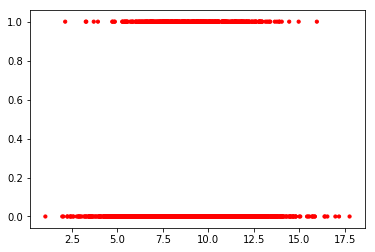

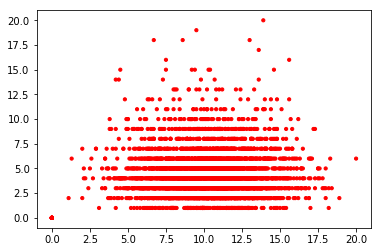

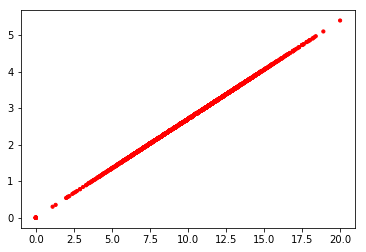

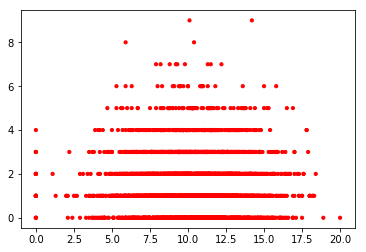

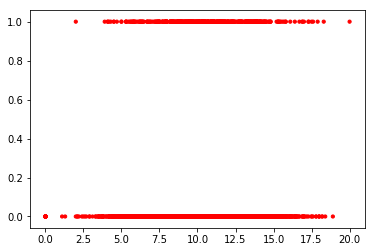

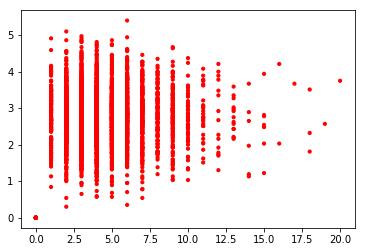

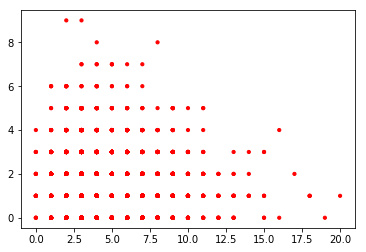

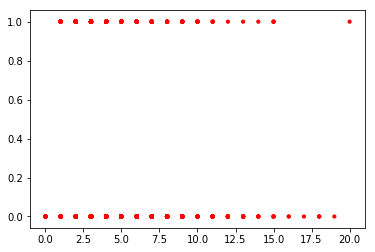

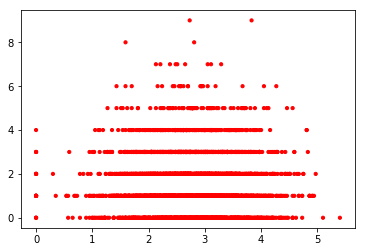

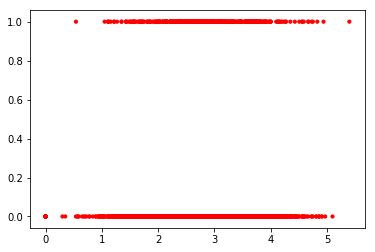

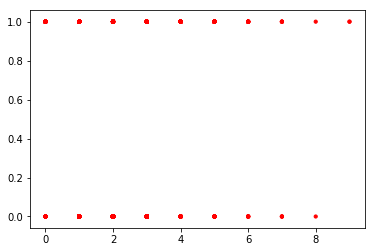

MeanShift(bandwidth=150, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [13]:
def run_MeanShift(df, scale, bandwidth):
    if(scale == True):
        dfx = scale(df)
    else:
        dfx = df
    clustering = MeanShift(bandwidth=bandwidth)
    clustering.fit(dfx)
    count_labels    = Counter(list(clustering.labels_))
    print(count_labels.keys())
    print(count_labels.values())
    col_names   = df.columns
    all_comb    = list(combinations(col_names, 2))
    color_theme = np.array(['red','green','blue','yellow','black','pink','orange','brown','purple'])
    
    #permutate over all colummns !!!
    for i in range(len(all_comb)):
        plt.scatter(x=df[all_comb[i][0]], y=df[all_comb[i][1]], c=color_theme[clustering.labels_],s=10)
        plt.show()
    return clustering
run_MeanShift(df1, False, 150)